In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
headers_name = ['label', 'body_text']
SMS_SH_df = pd.read_csv("SMSSpamCollection.csv", sep="\t", header=None, names=headers_name)
SMS_SH_df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
SMS_SH_df.shape

(5568, 2)

In [4]:
SMS_SH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5568 non-null   object
 1   body_text  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
SMS_SH_df.describe()

,label,body_text
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [6]:
SMS_SH_df.label.value_counts()

ham     4822
spam     746
Name: label, dtype: int64

In [7]:
SMS_SH_df.label.value_counts(normalize=True)

ham     0.86602
spam    0.13398
Name: label, dtype: float64

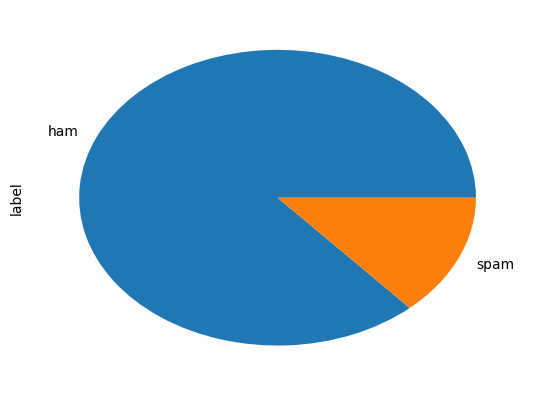

In [8]:
SMS_SH_df.label.value_counts(normalize=True).plot.pie()
plt.show()

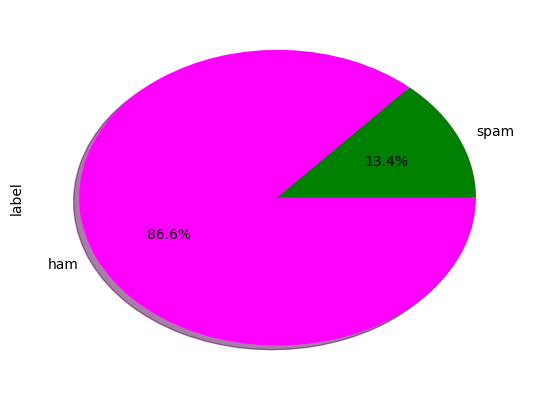

In [9]:
colors = ["magenta", "green", "purple", "orange"]

SMS_SH_df.label.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', shadow=True, startangle=0, counterclock=False, colors=colors)
plt.show()

In [10]:
SMS_SH_df.isnull().value_counts()

label  body_text
False  False        5568
dtype: int64

In [11]:
df = SMS_SH_df.copy()

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# %%time
# punct = string.punctuation
# text='Hello!!!, I love NLP, will use python in our code.'

# no_punct = ""
# for char in text:
#   if char not in punct:
#     no_punct = no_punct + char
# print(no_punct)

Hello I love NLP will use python in our code
Wall time: 0 ns


In [19]:
# %time
# text='Hello!!!, I love NLP, will use python in our code.'
# text_nopunct = ''.join(char for char in text if char not in string.punctuation)
# print(text_nopunct)

Wall time: 0 ns
Hello I love NLP will use python in our code


In [20]:
# %time
# text='Hello!!!, I love NLP, will use python in our code.'
# text_nopunct = ''.join([char for char in text if char not in string.punctuation])
# print(text_nopunct)

Wall time: 0 ns
Hello I love NLP will use python in our code


In [13]:
def remove_punct(text):
  text_nopunct = ''.join([char for char in text if char not in string.punctuation])
  return text_nopunct

In [25]:
pd.set_option('display.max_colwidth', 200)

In [15]:
df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x.lower()))
df.head()

,label,body_text,body_text_nopunc
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive been searching for the right words to thank you for this breather i promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will


Tokenization

In [16]:
import re

In [18]:
%time
text = 'I love NLP, will use python in our code.'
tokens = re.split('\W+', text)
tokens

Wall time: 0 ns


['I', 'love', 'NLP', 'will', 'use', 'python', 'in', 'our', 'code', '']

In [23]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [26]:
df['body_text_tokenized'] = df['body_text_nopunc'].apply(lambda x: tokenize(x))
df.head()

,label,body_text,body_text_nopunc,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]"


In [27]:
import nltk
from nltk.corpus import stopwords

In [28]:
stopwords_En = nltk.corpus.stopwords.words('english')
stopwords_En

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

In [30]:
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


Stopwords in arabic

In [31]:
stopwords_Ar = nltk.corpus.stopwords.words('arabic')
stopwords_Ar

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [32]:
text_Ar = "إن يوماً باقياً من العمر ... هو للمؤمن عمر ما ينبغى أن يستهان به"

In [34]:
text_ar_nopunct = "".join([char for char in text_Ar if char not in string.punctuation])
text_ar_nopunct

'إن يوماً باقياً من العمر  هو للمؤمن عمر ما ينبغى أن يستهان به'

In [35]:
text_Ar_tokens = nltk.word_tokenize(text_ar_nopunct)
text_Ar_tokens

['إن',
 'يوماً',
 'باقياً',
 'من',
 'العمر',
 'هو',
 'للمؤمن',
 'عمر',
 'ما',
 'ينبغى',
 'أن',
 'يستهان',
 'به']

In [36]:
text_Ar_nostop = [word for word in text_Ar_tokens if word not in stopwords_Ar]
text_Ar_nostop

['يوماً', 'باقياً', 'العمر', 'للمؤمن', 'عمر', 'ينبغى', 'يستهان']

In [37]:
import nltk
ps = nltk.PorterStemmer()

In [38]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [39]:
print(ps.stem('better'))

better


In [40]:
print(ps.stem('play'))
print(ps.stem('playing'))
print(ps.stem('played'))
print(ps.stem('plays'))

play
play
play
play


In [43]:
# Over stemming

print(ps.stem('universal'))
print(ps.stem('university'))
print(ps.stem('universe'))

univers
univers
univers


In [45]:
# Under stemming

print(ps.stem('alumuns'))
print(ps.stem('alumni'))
print(ps.stem('alumnae'))

alumun
alumni
alumna
